In [39]:
from protlearn.features import * 
import pandas as pd 
from Bio import SeqIO
import pylab
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = "white"

# Retrive and rename data 

* Download the sequences from Fantini et al:
https://academic.oup.com/mbe/article/37/4/1179/5610534#supplementary-data

* Download the parental (WT) betalactamase TEM-1 seq from associated w/PDB structure:
https://www.rcsb.org/structure/1ZG4
 

```
# sort seqs by len and rename headers 
seqkit sort -l bla.GEN1_ccs.alllength.pep | seqkit replace -p .+ -r "g1_{nr}" > g1_renamed.fa
seqkit sort -l bla.GEN5_ccs.alllength.pep | seqkit replace -p .+ -r "g5_{nr}" > g5_renamed.fa
seqkit sort -l bla.GEN12_ccs.longest.orf.pep | seqkit replace -p .+ -r "g12_{nr}" > g12_renamed.fa

# sample all seqs w/286aa of len
seqkit seq -m 286 -M 286 g12_renamed.fa > g12_renamed_len286.fa
seqkit seq -m 286 -M 286 g5_renamed.fa > g5_renamed_len286.fa
seqkit seq -m 286 -M 286 g1_renamed.fa > g1_renamed_len286.fa

# Viz stats
seqkit stats *fa

--------------------------------------------------------------------------------------------
file                   format  type     num_seqs     sum_len  min_len  avg_len  max_len
g12_renamed.fa         FASTA   Protein   154,528  40,569,057       42    262.5      308
g12_renamed_len286.fa  FASTA   Protein    64,402  18,418,972      286      286      286
g1_renamed.fa          FASTA   Unlimit   214,046  55,970,701        0    261.5      348
g1_renamed_len286.fa   FASTA   Protein   177,253  50,694,358      286      286      286
g5_renamed.fa          FASTA   Unlimit   212,923  54,765,639        0    257.2      302
g5_renamed_len286.fa   FASTA   Protein   178,799  51,136,514      286      286      286
wt.fa                  FASTA   Protein         1         286      286      286      28
--------------------------------------------------------------------------------------------

```

Do the same for TEM-1 seqs of Stiffler et al https://www.cell.com/fulltext/S0092-8674(15)00078-1 (retrived from https://www.protabank.org/)

```
# convert tab to fasta 
cut -d , -f5,6 Rama_ProtaBank.csv | sed "s/,/\t/g" | tail -n +2 | seqkit tab2fx > Rama_ProtaBank.fa

# remove duplicated seqs labeles by assay conditions to keep the unique 4,997 variants
seqkit rmdup Rama_ProtaBank.fa > Rama_ProtaBank_4997seqs.fa 

# viz stats 
seqkit stats Rama_ProtaBank.fa Rama_ProtaBank_4997seqs.fa

--------------------------------------------------------------------------------------------
file                        format  type     num_seqs     sum_len  min_len  avg_len  max_len
Rama_ProtaBank.fa           FASTA   Protein    69,730  19,942,780      286      286      286
Rama_ProtaBank_4997seqs.fa  FASTA   Protein     4,997   1,429,142      286      286      286
--------------------------------------------------------------------------------------------
```

# Length histograms 

In [40]:
# set raw seqs of Fantini et al
g1_raw = "/home/gama/desktop/fantini_data/raw_data/bla.GEN1_ccs.alllength.pep"
g5_raw = "/home/gama/desktop/fantini_data/raw_data/bla.GEN5_ccs.alllength.pep"
g12_raw = "/home/gama/desktop/fantini_data/raw_data/bla.GEN12_ccs.longest.orf.pep"

In [41]:
# Load raw files from supplementary materials of Fantini et al.
g1 = [len(i) for i in SeqIO.parse(g1_raw, "fasta")]
g5 = [len(i) for i in SeqIO.parse(g5_raw, "fasta")]
g12 = [len(i) for i in SeqIO.parse(g12_raw, "fasta")]

In [83]:
plt.rcParams["figure.figsize"] = [40,5]

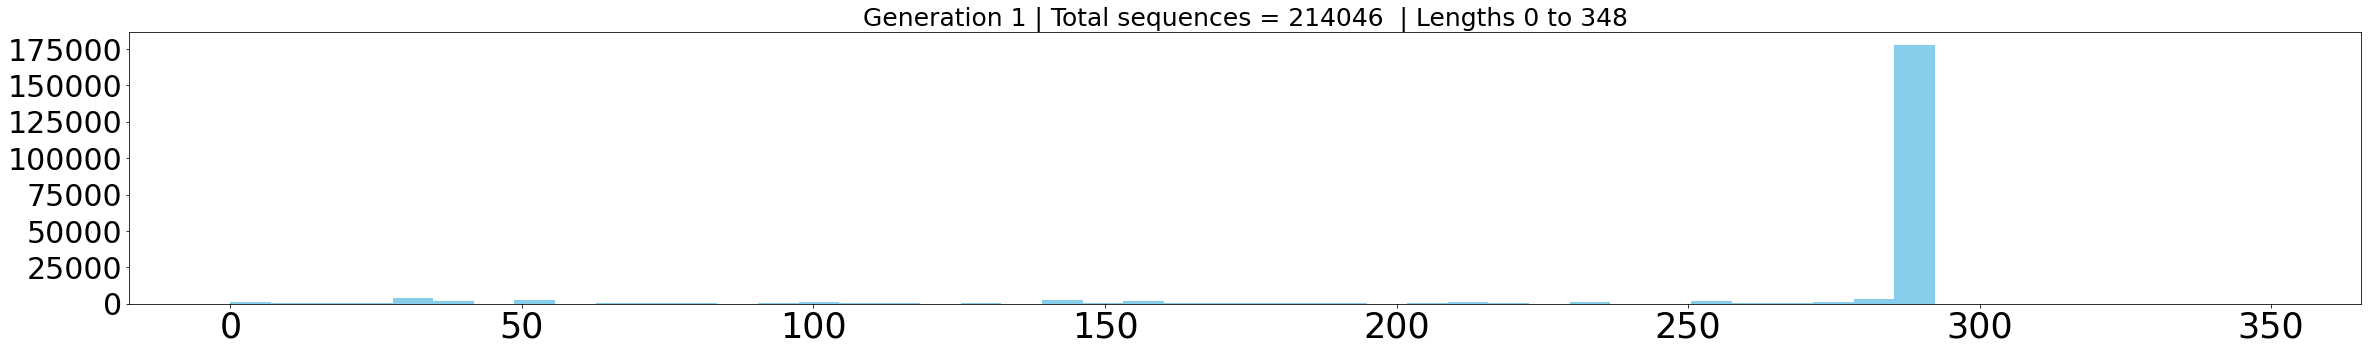

In [102]:
# G1  color = "skyblue"
pylab.hist(g1, bins=50, color = "skyblue")
pylab.title("Generation 1 | Total sequences = %i  | Lengths %i to %i" % (len(g1), min(g1), max(g1)),size=25)
#pylab.xlabel("Sequence length (aminoacids)",size=25)
#pylab.ylabel("Count",size=25)
plt.xticks(fontsize=35)
plt.yticks(fontsize=30)
pylab.show()

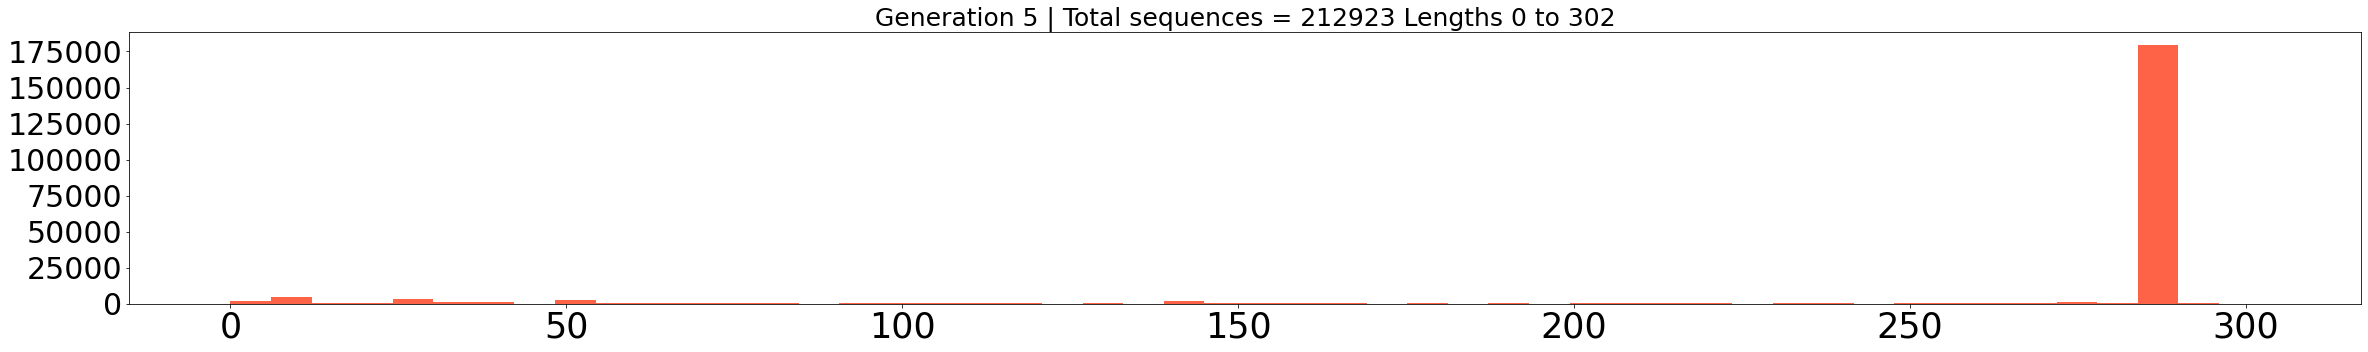

In [103]:
# G5
pylab.hist(g5, bins=50, color = "tomato")
pylab.title("Generation 5 | Total sequences = %i Lengths %i to %i" % (len(g5), min(g5), max(g5)),size=25)
#pylab.xlabel("Sequence length (aminoacids)",size=25)
#pylab.ylabel("Count",size=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=30)

pylab.show()

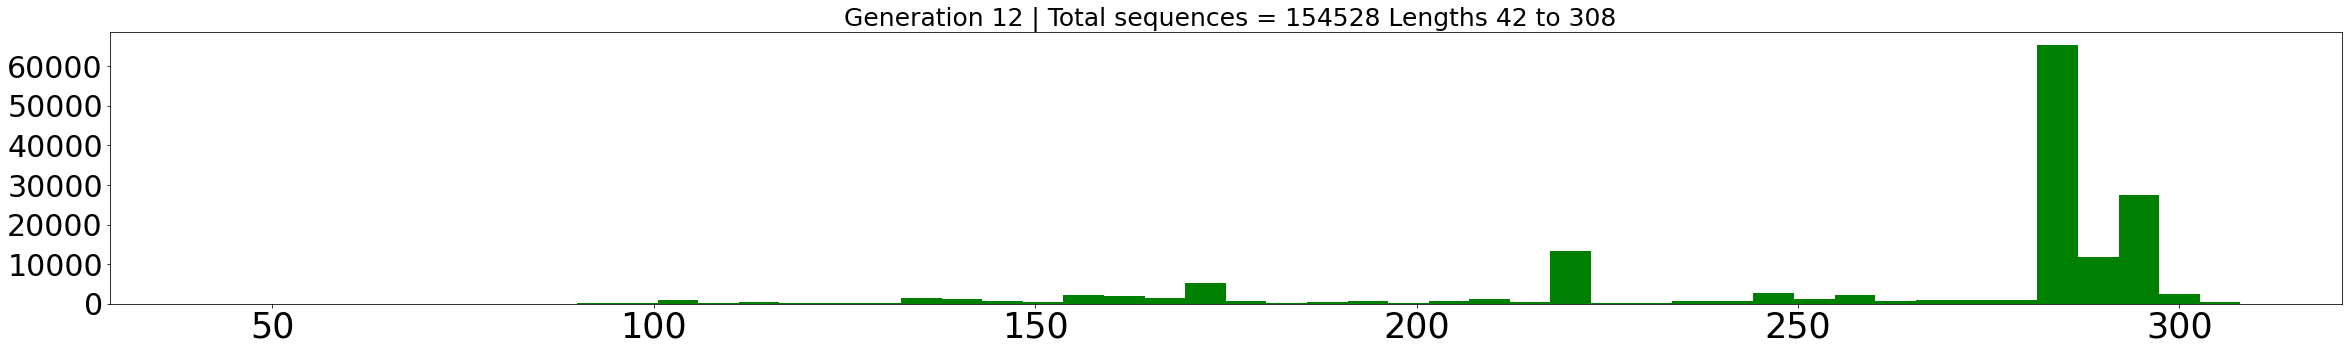

In [104]:
# G12
pylab.hist(g12, bins=50, color = "green")
pylab.title(" Generation 12 | Total sequences = %i Lengths %i to %i" % (len(g12), min(g12), max(g12)),size=25)
#pylab.xlabel("Sequence length (aminoacids)",size=35)
#pylab.ylabel("Count",size=25)
plt.xticks(fontsize=35)
plt.yticks(fontsize=30)
pylab.show()

# Get entropies 

In [68]:
plt.rcParams["figure.figsize"] = [16,9]

In [46]:
# set seqs 
wt = "/home/gama/desktop/fantini_data/wt.fa"
g1_fa = "/home/gama/desktop/fantini_data/g1_renamed_len286.fa"
g5_fa = "/home/gama/desktop/fantini_data/g5_renamed_len286.fa"
g12_fa = "/home/gama/desktop/fantini_data/g12_renamed_len286.fa"
rama = "/home/gama/desktop/fantini_data/micelaneos/Rama_ProtaBank_4997seqs.fa"

In [47]:
# compute entropies 
g1_entropy = entropy(g1_fa)
g5_entropy = entropy(g5_fa)
g12_entropy = entropy(g12_fa) 
wt_entropy = entropy(wt)
rama_entropy = entropy(rama)

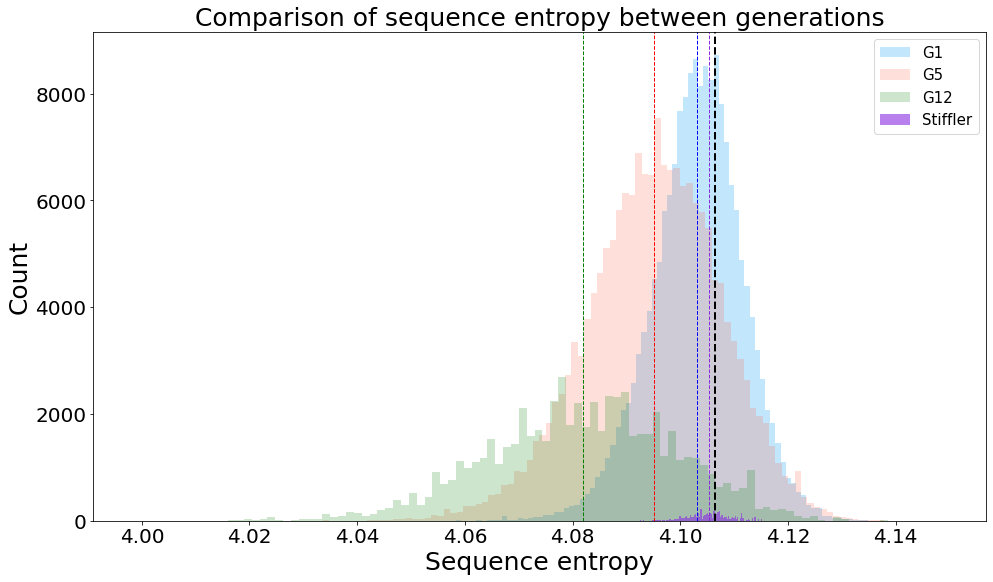

In [48]:
# Viz data
plt.hist(g1_entropy, color="lightskyblue", bins=100,alpha=0.5, label="G1",histtype='stepfilled')
plt.hist(g5_entropy, color="tomato", bins=100,alpha=0.2, label="G5",histtype='stepfilled')
plt.hist(g12_entropy, color="green", bins=100,alpha=0.2, label="G12",histtype='stepfilled')
plt.hist(rama_entropy, color="blueviolet", bins=100,alpha=0.6, label="Stiffler",histtype='stepfilled')

# add wt entropy as reference 
plt.axvline(wt_entropy, color='black', linestyle='dashed', linewidth=2)
# And mean vals for generations
plt.axvline(g1_entropy.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(g5_entropy.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(g12_entropy.mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(rama_entropy.mean(), color='blueviolet', linestyle='dashed', linewidth=1)

# add labels
plt.xlabel("Sequence entropy", size=25)
plt.ylabel("Count", size=25)
plt.title("Comparison of sequence entropy between generations", size=25)
plt.legend(prop={"size":15}, loc="upper right") 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.savefig("entropy_generations.png")
plt.show()

In [70]:
plt.rcParams["figure.figsize"] = [20,5]

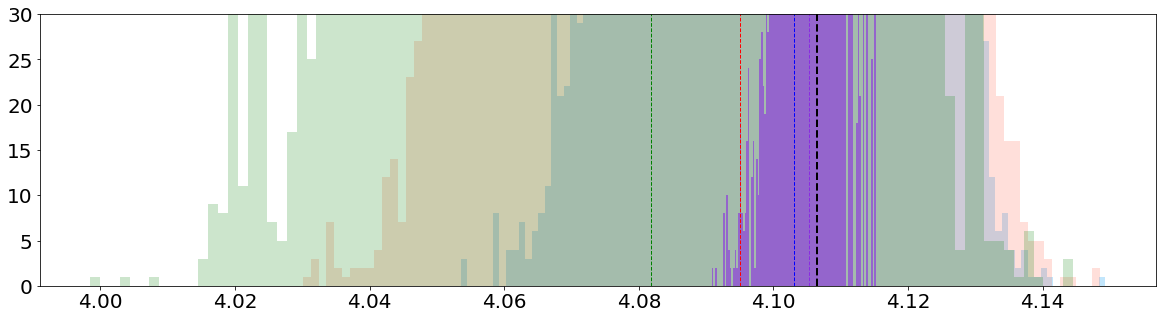

In [73]:
# set y-axis limit to zoom
plt.ylim([0, 30])

# Viz data 
plt.hist(g1_entropy, color="lightskyblue", bins=100,alpha=0.5, label="G1",histtype='stepfilled')
plt.hist(g5_entropy, color="tomato", bins=100,alpha=0.2, label="G5",histtype='stepfilled')
plt.hist(g12_entropy, color="green", bins=100,alpha=0.2, label="G12",histtype='stepfilled')
plt.hist(rama_entropy, color="blueviolet", bins=100,alpha=0.6, label="Stiffler",histtype='stepfilled')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# add wt entropy as reference 
plt.axvline(wt_entropy, color='k', linestyle='dashed', linewidth=2)
# And mean vals
plt.axvline(g1_entropy.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(g5_entropy.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(g12_entropy.mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(rama_entropy.mean(), color='blueviolet', linestyle='dashed', linewidth=1)

# add labels
# plt.title("inset", size=15)
# plt.legend(prop={"size":15}, loc="upper right") 
# plt.savefig("zoom_generations.png")
plt.show()

# Fitness predictions 

``` 
real_negatives.fa contain 15 mutants  replacing Ala in all or each residue in:
* Active site (Act) :S68 + E166 
* Disulfide bonds: C75 + C121
* Binding site (bs): 232-234 KGS 
* Met init: 1M

according to:
```
https://www.rcsb.org/sequence/1ZG4
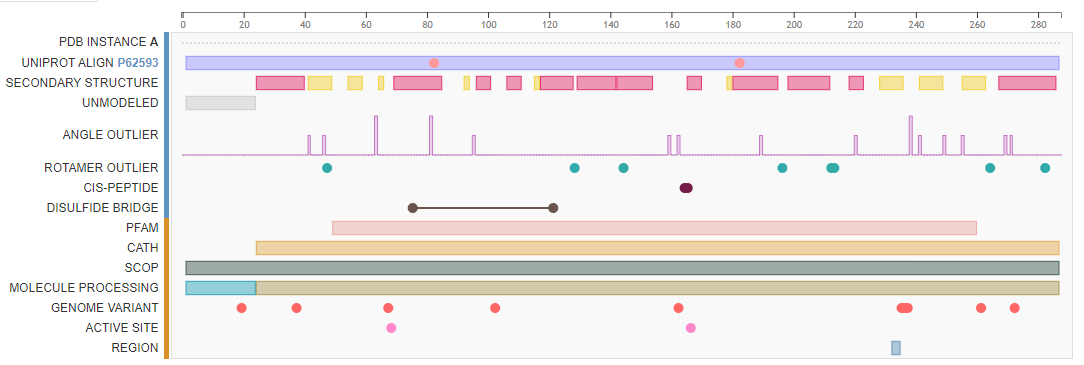 

```
# random sample of 10k seqs per generation 
seqkit sample -n 10000 g1_renamed_len286.fa > rand10k_g1_renamed_len286.fa
seqkit sample -n 10000 g5_renamed_len286.fa > rand10k_g5_renamed_len286.fa
seqkit sample -n 10000 g12_renamed_len286.fa > rand10k_g12_renamed_len286.fa

# Due to effect of random seed sampling by amount (N), the generated random number is pseudo 
random and affected by the random seed (-s/--rand-seed), the number of sampled records may not be equal to N

# merge files
cat real_negatives.fa  rand10k*.fa > allG_rand10k_len286_wt_real_negatives.fa

# fit. predictions w/seqDes
calc_logprobs_seqs_fr --sess BLAT_ECOLX_v2_channels-48_rseed-11_19Aug16_0626PM.ckpt-250000 \
--dropout-p 0.5 --num-samples 100 --input input/allG_rand10k_len286_wt_real_negatives.fa \
--output output/allG_rand10k_len286_wt_real_negatives.csv

```

In [50]:
plt.rcParams["figure.figsize"] = [16,9] 

In [211]:
# load data 
fit_preds_10k = pd.read_csv("../fitness_preds/allG_rand10k_len286_wt_real_negatives.csv")
fit_preds_10k

,name,mean-channels_48,bitperchar-channels_48,forward-channels_48,reverse-channels_48,entropy_f-channels_48,entropy_r-channels_48,sequence
0,>g12_48042,499.449239,1.746326,527.156712,471.741768,281.998158,239.624088,MSTRHFRTALILFFAAFCLPVFAHPETLVKVKDAGDQLGARVGYVE...
1,>g12_48047,481.725031,1.684353,550.702003,412.748058,283.973976,226.013785,MSIQRIRVALIPFLAAFCPPVFAHPETLVKVKEAEDQLGARVGYVE...
2,>g12_48052,478.126777,1.671772,527.624641,428.628912,286.171571,235.091965,MRIQRFRAALIPFSAVFCLPVLAHPETLVKVKDAEEQLGARVGYIE...
3,>g12_48057,492.635601,1.722502,550.860717,434.410486,283.302223,228.876236,MSILHFRVALIPFFAAFCHPVFAHPETLAKVKDAEERLGARVGYIE...
4,>g12_48068,484.680790,1.694688,562.528537,406.833045,290.161146,234.630506,MSILRYRVALIPFFAAFCLPVFAHPDTLVKVKEAEDQLGARVGYIE...
...,...,...,...,...,...,...,...,...
29479,>negative_bs_allA,405.716746,1.418590,483.727367,327.706124,280.929719,218.830446,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...
29480,>negative_bs_K232A_S233A,395.975413,1.384529,469.770204,322.180622,277.471789,216.848035,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...
29481,>negative_bs_K232A_G234A,402.882740,1.408681,481.203054,324.562422,278.534655,217.209845,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...
29482,>negative_bs_S233A_G234A,397.951297,1.391438,481.088624,314.813971,277.529135,215.015755,MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIE...


The main results from above df come from "mean-channels_48" interpreted as global fitness predictions. Entropy and bit-per-channel are performance metrics of NLP. forward and reverse are interpreted as sequence predictions from 5'->3' and  3'->5' during the trainig process. 

In [212]:
# subsample
fit = fit_preds_10k[["name","mean-channels_48"]]
fit

,name,mean-channels_48
0,>g12_48042,499.449239
1,>g12_48047,481.725031
2,>g12_48052,478.126777
3,>g12_48057,492.635601
4,>g12_48068,484.680790
...,...,...
29479,>negative_bs_allA,405.716746
29480,>negative_bs_K232A_S233A,395.975413
29481,>negative_bs_K232A_G234A,402.882740
29482,>negative_bs_S233A_G234A,397.951297


In [213]:
# show wt value prediction 
wt_df = fit[fit['name'].str.contains(">wt")]
x_wt = float(wt_df["mean-channels_48"])
x_wt

376.6123260498047

In [214]:
# normalize data 
min_val = fit["mean-channels_48"].min()
fit["norm"] = (fit["mean-channels_48"]-min_val)/(x_wt-min_val)
fit

<ipython-input-214-7466af4bb4af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit["norm"] = (fit["mean-channels_48"]-min_val)/(x_wt-min_val)


,name,mean-channels_48,norm
0,>g12_48042,499.449239,7.764100
1,>g12_48047,481.725031,6.788104
2,>g12_48052,478.126777,6.589964
3,>g12_48057,492.635601,7.388902
4,>g12_48068,484.680790,6.950865
...,...,...,...
29479,>negative_bs_allA,405.716746,2.602655
29480,>negative_bs_K232A_S233A,395.975413,2.066242
29481,>negative_bs_K232A_G234A,402.882740,2.446599
29482,>negative_bs_S233A_G234A,397.951297,2.175045


In [215]:
# show wt value prediction again 
fit[fit['name'].str.contains(">wt")]

,name,mean-channels_48,norm
29468,>wt,376.612326,1.0


In [216]:
#show top 20 seqs w/best fit
fit.sort_values(by=['norm'],ascending=False).head(20)

,name,mean-channels_48,norm
1915,>g12_60752,700.702751,18.846264
7470,>g12_97038,670.884882,17.204323
3267,>g12_69513,670.743604,17.196543
3194,>g12_68975,668.787788,17.088845
2754,>g12_66038,658.236766,16.507845
10668,>g1_50644,628.624130,14.877205
25910,>g5_148649,625.734049,14.718061
4684,>g12_78905,625.336434,14.696166
817,>g12_53465,620.620873,14.436500
3959,>g12_73915,619.380823,14.368216


In [183]:
# fit.to_csv("top20_preds.csv", index=False)

In [217]:
# show negative seqs and turn sad :( 
fit[fit['name'].str.contains(">negative")]

,name,mean-channels_48,norm
29469,>negative_allA,447.293308,4.892097
29470,>negative_act_S68A,391.714170,1.831594
29471,>negative_act_E166A,380.988723,1.240989
29472,>negative_act_allA,396.407260,2.090022
29473,>negative_SS_C75A,384.354475,1.426327
29474,>negative_SS_C121A,389.274207,1.697235
29475,>negative_SS_allA,397.497698,2.150068
29476,>negative_bs_K232A,391.563258,1.823283
29477,>negative_bs_S233A,384.111193,1.412930
29478,>negative_bs_G234A,389.691407,1.720209


In [218]:
# create sets per category 
g1_set = fit[fit['name'].str.contains(">g1_")]
g5_set = fit[fit['name'].str.contains(">g5_")]
g12_set = fit[fit['name'].str.contains(">g12_")]
negat_set = fit[fit['name'].str.contains(">negative_")]

# take val norm cols
g1_preds = g1_set["norm"]
g5_preds = g5_set["norm"]
g12_preds = g12_set["norm"]
negat_preds = negat_set["norm"]

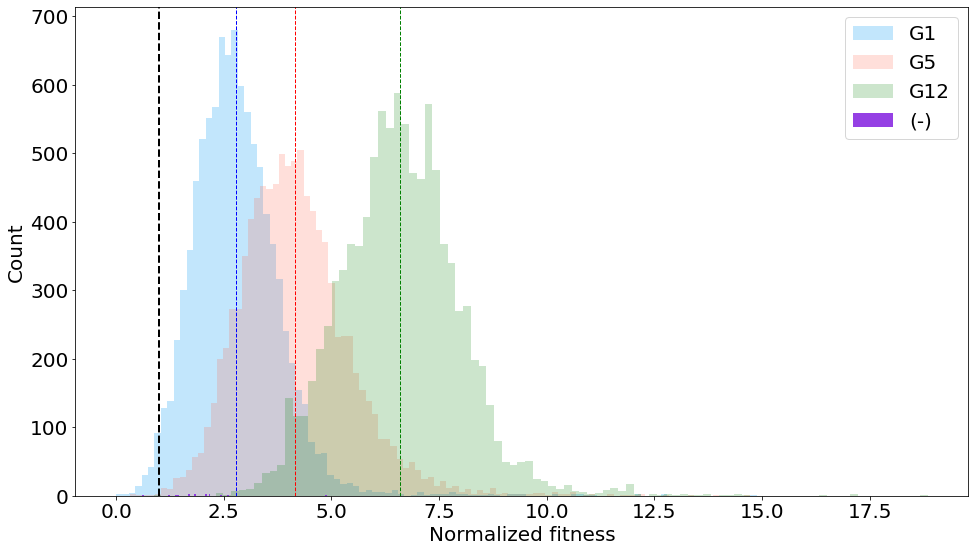

In [219]:
# plot 
plt.hist(g1_preds, color="lightskyblue", bins=100,alpha=0.5, label="G1",histtype='stepfilled')
plt.hist(g5_preds, color="tomato", bins=100,alpha=0.2, label="G5",histtype='stepfilled')
plt.hist(g12_preds, color="green", bins=100,alpha=0.2, label="G12",histtype='stepfilled')
plt.hist(negat_preds, color="blueviolet", bins=100,alpha=0.9, label="(-)",histtype='stepfilled')

#lines
plt.axvline(g1_preds.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(g5_preds.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(g12_preds.mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(1, color='black', linestyle='dashed', linewidth=2)

# labels
plt.xlabel("Normalized fitness", size=20)
plt.ylabel("Count", size=20)
# plt.title("Comparison of fitness predictions by SeqDesign", size=20)
plt.legend(prop={"size":20}) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("entropy_generations.png")
plt.show()

In [162]:
plt.rcParams["figure.figsize"] = [20,5]

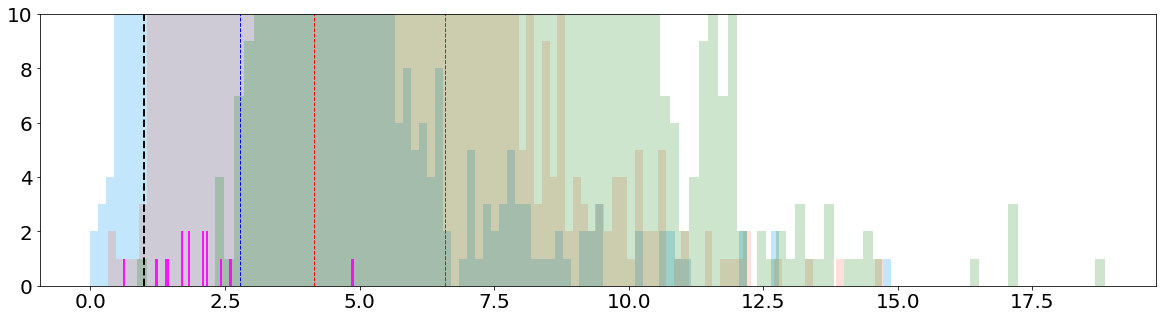

In [164]:
# set y-axis limit to zoom
plt.ylim([0, 10])

# plot 
plt.hist(g1_preds, color="lightskyblue", bins=100,alpha=0.5, label="G1",histtype='stepfilled')
plt.hist(g5_preds, color="tomato", bins=100,alpha=0.2, label="G5",histtype='stepfilled')
plt.hist(g12_preds, color="green", bins=100,alpha=0.2, label="G12",histtype='stepfilled')
plt.hist(negat_preds, color="magenta", bins=100,alpha=0.9, label="(-)",histtype='stepfilled')

#lines
plt.axvline(g1_preds.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(g5_preds.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(g12_preds.mean(), color='green', linestyle='dashed', linewidth=1)
plt.axvline(1, color='black', linestyle='dashed', linewidth=2)

# labels
#plt.xlabel("Min-Max normalized WT RELATIVE Fitness predictions", size=20)
#lt.ylabel("Count", size=20)
# plt.title("Comparison of fitness predictions by SeqDesign", size=20)
#lt.legend(prop={"size":20}) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("entropy_generations.png")
plt.show()

```
# sample ir seqs from top20 fitness preds  
cut -d , -f1 top20_preds.csv | sed "s/>//g" > ids_top20.txt

# find them 
seqkit grep -f ids_top20.txt ALL_SEQUENCES.fasta -o top20_preds.fa

#concatenate w/wt 
cat top20_preds.fa ../../fantini_data/wt.fa > ~gama/desktop/to_aln_top20_wt.fa
``` 

In [ ]:
a

## get noise 

create a set of mutants in residues S68, S128, E164 y E166  

# Equals to read from fasta file 
wt_seq = "MSIQHFRVALIPFFAAFCLPVFAHPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRIDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPVAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW"

wt_toy = "MAAAA"

wt_list_toy = list(wt_toy)
wt_list_toy

wt_list_toy[4] = 'W' # postition n-1
a = ''.join(wt_list_toy)
a

jo = wt_toy[:4] + 'Z' + wt_toy[2:]
jo

aa = ["A","b", "c"]

for i in aa:
    print(i)

Download the Beta-lactamase2 (PF13354) full alignament (7057 seqs) to build a consensus sequence:

 http://pfam.xfam.org/family/PF13354

In [ ]:
msa_pfam = "/home/gama/downloads/PF13354_full.txt"
msa_wt_g12 = "/home/gama/downloads/RESULTS_WEBSERVER_wt_merged_g12_renamed_len286.fasta"

In [ ]:
from Bio import AlignIO

In [ ]:
align = AlignIO.read(msa_wt_g12, "fasta")
print(align)

In [ ]:
len(align)

In [ ]:
for record in align:
    print("%s %i" % (record.id, len(record)))

In [ ]:
print(align[0].seq)

In [ ]:
print(align[0].id)

In [ ]:
print(align[:, :10])

In [ ]:
import Bio.Align.AlignInfo as jaja 

In [ ]:
jaja.SummaryInfo.dumb_consensus(align, )